In [2]:
from pycoingecko import CoinGeckoAPI
gecko = CoinGeckoAPI()

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook

import datetime as dt

import numpy as np

In [3]:
DF = pd.read_parquet("CoinGecko_2013-04-28_2021-03-28.parquet")

DF.head()

01coin                   0-5x-long-algorand-token              \
           Market Cap Volume Open Close               Market Cap Volume Open   
Date                                                                           
2013-04-28        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-04-29        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-04-30        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-05-01        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   
2013-05-02        NaN    NaN  NaN   NaN                      NaN    NaN  NaN   

                 0-5x-long-altcoin-index-token         ...  zyx        \
           Close                    Market Cap Volume  ... Open Close   
Date                                                   ...              
2013-04-28   NaN                           NaN    NaN  ...  NaN   NaN   
2013-04-29   NaN                           NaN    NaN  ...  NaN   NaN   
2013-04-30   NaN                           NaN    NaN  ...  NaN   NaN   
2013-05-01   NaN                           NaN    NaN  ...  NaN   NaN   
2013-05-02   NaN                           NaN    NaN  ...  NaN   NaN   

           zzz-finance                   zzz-finance-v2                    
            Market Cap Volume Open Close     Market Cap Volume Open Close  
Date                                                                       
2013-04-28         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-04-29         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-04-30         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-05-01         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  
2013-05-02         NaN    NaN  NaN   NaN            NaN    NaN  NaN   NaN  

[5 rows x 26192 columns]

In [4]:
coins_list = pd.DataFrame(gecko.get_coins_list())

In [31]:
df = DF.iloc[2000:2010, :8]

for coin, sub_df in df.groupby(level=0, axis=1):
    print (coin, sub_df[coin].columns)

0-5x-long-algorand-token Index(['Market Cap', 'Volume', 'Open', 'Close'], dtype='object')
01coin Index(['Market Cap', 'Volume', 'Open', 'Close'], dtype='object')


In [56]:
def zscore(df):
    return (df - df.mean())/df.std()

In [68]:
def condition_volume_zscore(df, from_date = '20210101', threshold = 5):
    return (zscore(df['Volume']).loc[from_date:] > threshold).any()

In [94]:
def condition_price_crash(df, threshold = 0.10):
    if pd.isna(df.loc['20180101']['Open']) or pd.isna(df.loc['20190101']['Open']):
        return False
    else:
        return df.loc['20190101']['Open']/df.loc['20180101']['Open'] < threshold

In [104]:
def condition_price_stable(df, threshold = 0.50):
    if pd.isna(df.loc['20190101']['Open']) or pd.isna(df.loc['20210101']['Open']):
        return False
    else:
        return (1 - threshold) < (df.loc['20210101']['Open']/df.loc['20190101']['Open']) < (1 + threshold)

In [111]:
def condition_price_rocket(df, threshold = 5):
    if pd.isna(df.loc['20210101']['Open']) or pd.isna(df.loc['20210328']['Open']):
        return False
    else:
        return df.loc['20210328']['Open']/df.loc['20210101']['Open'] > threshold

In [127]:
def condition_price_quantile(df, threshold = 0.9):
    return df.loc['20210328']['Open'] < df['Open'].loc['20180101':].quantile(threshold)

In [132]:
def check_conditions(coin_id = None, DF = None, df = None):
    if (coin_id is not None) and (DF is not None):
        df = DF[coin_id]
    elif df is None:
        assert False
    return condition_volume_zscore(df) and \
               condition_price_crash(df) and \
               condition_price_stable(df) and \
               condition_price_quantile(df)

In [135]:
check_conditions(coin_id = 'bitcoin', DF = DF)

False

In [121]:
sub_df

,Market Cap,Volume,Open,Close,Volume Z
Date,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-03-24,1.811712e+08,2.945732e+07,12.975290,11.467786,0.435551
2021-03-25,1.587879e+08,2.070098e+07,11.467786,10.942126,0.255482
2021-03-26,1.523951e+08,1.979572e+07,10.942126,11.621472,0.236866


<IPython.core.display.Javascript object>


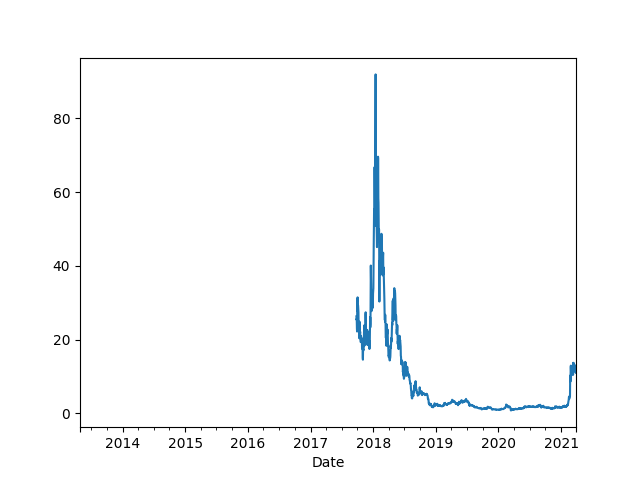

<AxesSubplot:xlabel='Date'>

In [93]:
sub_df['Open'].plot()

# Moonshots

In [150]:
moonshot_syms = ['spnd', 'qtum', 'iost', 'dent', 'ont', 'icx', 'zec', 'lsk', 'etn', 'btg', 'waxp', 'kcs', 'ardr', 'agi', 'ark', 'steem', 'qkc', 'alice', 'kmd', 'med', 'bitshares', 'fun', 'wan', 'pivx', 'rdd', 'powr', 'btm', 'gas', 'elf', 'strax', 'monacoin', 'lbc', 'nrg', 'loom', 'refereum', 'blz', 'cbat', 'adx', 'ela', 'solve', 'req']

In [157]:
moonshots = []

for coin in moonshot_syms:
    r = coins_list.loc[(coins_list['id'] == coin) | (coins_list['symbol'] == coin)]
    if len(r) == 1:
        moonshots.append(r['id'].item())
        # print ("{}: {}, {}".format(r['id'].iloc[0], r['name'].iloc[0], r['symbol'].iloc[0]))
    elif len(r) > 1:
        print ("{} is not unique!".format(coin))
    else:
        print ("{} not found!".format(coin))

moonshots.sort()

In [160]:
for coin_id in moonshots:
    if check_conditions(coin_id = coin_id, DF = DF):
        print ("PASS", coin_id)
    else:
        print ("FAIL", coin_id)

FAIL adex
FAIL aelf
FAIL ardor
PASS ark
FAIL bitcoin-gold
PASS bitshares
FAIL bluzelle
FAIL bytom
FAIL compound-basic-attention-token
FAIL dent
FAIL elastos
FAIL electroneum
FAIL energi
PASS funfair
PASS gas
FAIL icon
FAIL iostoken
PASS komodo
FAIL kucoin-shares
FAIL lbry-credits
PASS lisk
FAIL loom-network
FAIL medibloc
FAIL monacoin
FAIL my-neighbor-alice
FAIL ontology
FAIL pivx
FAIL power-ledger
PASS qtum
FAIL quark-chain
FAIL reddcoin
FAIL refereum
FAIL request-network
FAIL singularitynet
FAIL solve-care
FAIL spendcoin
PASS steem
FAIL stratis
FAIL wanchain
FAIL wax
FAIL zcash
